<center> <h1>BDA - Assignment 1</h1> </center>

In [1]:
# Loading necessary packages
library(ggplot2)
library(markmyassignment)
# Ignoring warnings
options(warn=-1)

## Exercise 1) 

(basic probability theory and notation)

- probability: the probability of an event is the frequency of such event out of many trials.
- probability mass: is the probability that a discrete random variable is equal to some value.
- probability density: is the probability that a continuous random variable falls very closely to some value.
- probability mass function: is the function that describes the probability mass over the sample space.
- probability density function: is the function that describes the probability density over the sample space.
- probability distribution: a more general and somewhat ambiguous term that can relate to either a PMF or PDF.
- discrete probability distribution: same as PMF.
- continuous probability distribution: same as PDF.
- cumulative distribution function: a function that describes the probability that a draw from a random variable will be less than or equal to some value.
- likelihood: if we let $x$ be a random draw from random variable $X$, which has probability distribution $p$ that depends on a parameter $\theta$, then the likelihood is the function $L(\theta|x)=p_{\theta}(x) = P(X=x | \theta)$.

## Exercise 2)

(basic computer skills)

### a) 
Plotting the Beta distribution.

In [2]:
# reparameterazing
mu = 0.2
var = 0.001
alpha = mu * ((mu*(1-mu)/var)-1)
beta = alpha*(1-mu)/mu

In [3]:
# getting some draws from the Beta distribution
n = 1000
quantiles = seq(0,1,length.out = n)
df = data.frame(quantile=quantiles, density= dbeta(quantiles, alpha, beta))

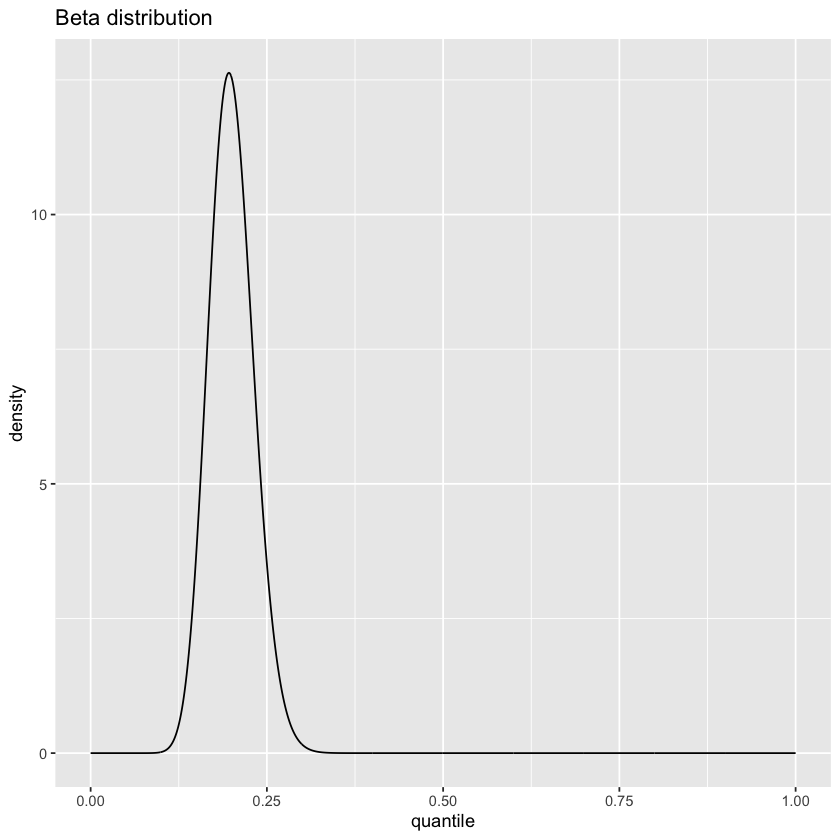

In [4]:
ggplot(df, aes(y=density, x=quantile)) + geom_line() + ggtitle("Beta distribution")

### b)

Getting 1000 samples from the distribution.

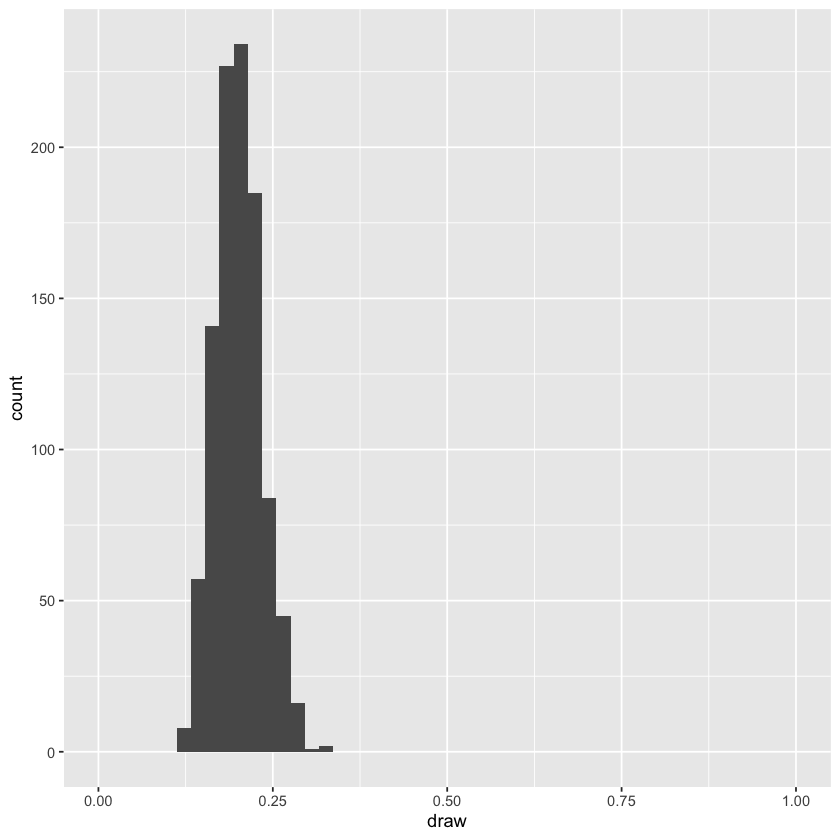

In [5]:
n = 1000
draws = data.frame(draw=rbeta(n, alpha, beta))
ggplot(draws, aes(x=draw)) + geom_histogram(bins=50) + xlim(0,1)

The histogram and the density cuver look very similar with the former being noisier.

### c)

Compare the true mean and variance to the sample's mean and variance.

In [6]:
mu-mean(draws$draw)

[1] -0.001206352

In [7]:
var-var(draws$draw)

[1] -7.386e-05

Both the sample mean and variance are very close to the true mean and variance. 

### d)

Estimate the central 95% probability interval from the drawn samples.

In [8]:
quantile(draws$draw, probs=c(0.025, 0.975))

2.5%     97.5% 
0.1424603 0.2713112

## Exercise 3)
(Bayes' theorem)

The true positive rate -- or $\mathbb{P}(\text{Positive result} | \text{Disease})$ -- is $98\%$.
And the true negative rate -- or $\mathbb{P}(\text{Negative result} | \text{Not disease})$ -- is $96\%$.

Although these rates seem high, they imply a high false discovery rate; that is, if the test is applied indiscriminately over a large random sample of the population, most of the positive test results will be from people without the disease.

In other words, we want to know $\mathbb{P}(\text{Not disease} | \text{Positive result})$. For that we need to apply the Bayes' Theorem.

In [9]:
TPR = 0.98
TNR = 0.96
prior = 1/1000

In [10]:
p_testpos_disease = TPR
p_testpos_notdisease = 1-TNR
p_testpos = (prior * p_testpos_disease) + ((1-prior)*p_testpos_notdisease)

In [11]:
p_disease_and_testpos = p_testpos_disease * prior

In [12]:
p_disease_testpos = p_disease_and_testpos / p_testpos

In [13]:
1-p_disease_testpos

[1] 0.9760625

With a false discovery rate of over $97\%$, many people will be un-necessarily receive medication and worry about having lung cancer when they in fact do **not** have it.

## Exercise 4)

(Bayes's theorem)

In [14]:
boxes <- matrix(c(2,4,1,5,1,3), ncol = 2,
dimnames = list(c("A", "B", "C"), c("red", "white")))
boxes
total = sum(boxes)
p_select = c("A"=0.4, "B"=0.1, "C"=0.5)

,red,white
A,2,5
B,4,1
C,1,3


In [15]:
p_red = function(boxes) {
    # Probability of picking red and white balls
    rel_freqs = boxes/apply(boxes, 1, sum)

    # probability of picking red and white conditioning on box selection
    probs_color_and_box = rel_freqs*p_select

    # marginalizing over boxes to get the probs of picking red/white
    marg_probs_color = apply(probs_color_and_box,2,sum)
    return(marg_probs_color["red"])
}

In [16]:
p_red(boxes)

red 
0.3192857

In [17]:
p_box = function(boxes) {
    # Probability of picking red and white balls cond on box
    rel_freqs = boxes/apply(boxes, 1, sum)

    # Joint probability of picking red and white with box selection
    probs_color_and_box = rel_freqs*p_select
    
    # Now we can compute the probabilities of red and white conditioning 
    # on the box
    p_col_cond_box = probs_color_and_box/p_red(boxes)
    return(p_col_cond_box[,"red"])
}

In [18]:
p_box(boxes)

A         B         C 
0.3579418 0.2505593 0.3914989

## Exercise 4)

(Baye's theorem)

<img src="figs/assig1_ex4.jpeg" alt="Reasoning Ex 4" width="500"/>

In [19]:
p_identical_twin = function(fraternal_prob, identical_prob) {
    # by the definition
    p_same_cond_type = c("frat"=0.5, "id"=1.0)
    type_probs = c("frat"=fraternal_prob, "id"=identical_prob)
    # normalizing the type probs (all calculations are conditioned
    # on the two siblings being twins
    norm_type_probs = type_probs/sum(type_probs)
    # marginalizing over types to compute the prob two twins have same sex 
    p_same = sum(p_same_cond_type*norm_type_probs)
    # now we can compute the prob of being same sex conditioning on twin type
    p_same_cond_type = (p_same_cond_type * norm_type_probs)/p_same
    return(p_same_cond_type["id"])
}

We know that the odds of having identical twins to fraternal twins is 15:40. That is, the probability a pair of twins are identical twins is 

In [20]:
15/(15+40)

[1] 0.2727273

By knowing that Elvis and his sibling had the same sex, we can update our expectation using Bayes' Theorem. We found that the probability they were identical twins is around

In [21]:
p_identical_twin(1/150,1/400)

id 
0.4285714

In [22]:
assignment_path <-
paste("https://github.com/avehtari/BDA_course_Aalto/",
"blob/master/assignments/tests/assignment1.yml", sep="")
set_assignment(assignment_path)
# To check your code/functions, just run
mark_my_assignment()

Assignment set:
assignment1: Bayesian Data Analysis: Assignment 1
The assignment contain the following (3) tasks:
- p_red
- p_box
- p_identical_twin




✔ | F W S  OK | Context
✔ |         4 | p_red() [0.1s]                                                                                           
✔ |         4 | p_box()                                                                                                            
✔ |         5 | p_identical_twin()                                                                                                 

══ Results ══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════
Duration: 0.2 s

[ FAIL 0 | WARN 0 | SKIP 0 | PASS 13 ]
Good work!